In [5]:
import random
import math
import matplotlib.pyplot as plt

In [16]:
# Generate n - dimension data for testing

def generate_data(n_samples = 300, n_features=2, n_centers=3):
    data = []
    for _ in range(n_centers):
        center = [random.uniform(-10, 10) for _ in range(n_features)]
        # for each center generate equal amount of data
        for _ in range(n_samples // n_features):
            point = [c + random.gauss(0, 1) for c in center]
            data.append(point)
    return data



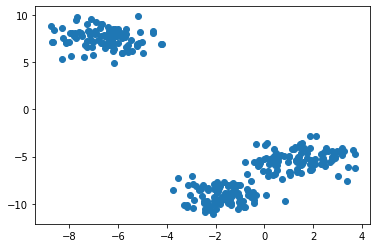

In [23]:
# Let's try to plot the generated data 
data = generate_data(300, 3, 3)
x = [point[0] for point in data]
y = [point[1] for point in data]
plt.scatter(x, y)


In [ ]:
def initialize_centroids(data, k):
    """Initialize K centroids randomly."""
    return random.sample(data, k)

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters

def update_centroids(clusters):
    """Calculate new centroids based on the current clusters."""
    new_centroids = []
    for cluster in clusters:
        if cluster:  # Avoid division by zero for empty clusters
            centroid = [sum(coord) / len(cluster) for coord in zip(*cluster)]
            new_centroids.append(centroid)
        else:
            new_centroids.append(random.choice(data))  # Reinitialize empty clusters
    return new_centroids


def kmeans(data, k, max_iterations=100):
    """Perform K-means clustering."""
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        old_centroids = centroids
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(clusters)
        
        if centroids == old_centroids:
            break
    
    return clusters, centroids

def kmeans(data, k, max_iter = 100):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iter):
        old_centroids = centroids
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(clusters)
        